# <b><u> Project Title : Taxi trip time Prediction : Predicting total ride duration of taxi trips in New York City</u></b>

## <b> Problem Description </b>

### Your task is to build a model that predicts the total ride duration of taxi trips in New York City. Your primary dataset is one released by the NYC Taxi and Limousine Commission, which includes pickup time, geo-coordinates, number of passengers, and several other variables.

## <b> Data Description </b>

### The dataset is based on the 2016 NYC Yellow Cab trip record data made available in Big Query on Google Cloud Platform. The data was originally published by the NYC Taxi and Limousine Commission (TLC). The data was sampled and cleaned for the purposes of this project. Based on individual trip attributes, you should predict the duration of each trip in the test set.

### <b>NYC Taxi Data.csv</b> - the training set (contains 1458644 trip records)


### Data fields
* #### id - a unique identifier for each trip
* #### vendor_id - a code indicating the provider associated with the trip record
* #### pickup_datetime - date and time when the meter was engaged
* #### dropoff_datetime - date and time when the meter was disengaged
* #### passenger_count - the number of passengers in the vehicle (driver entered value)
* #### pickup_longitude - the longitude where the meter was engaged
* #### pickup_latitude - the latitude where the meter was engaged
* #### dropoff_longitude - the longitude where the meter was disengaged
* #### dropoff_latitude - the latitude where the meter was disengaged
* #### store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip
* #### trip_duration - duration of the trip in seconds

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [114]:
# Import Required Packages.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt
import warnings
warnings.filterwarnings("ignore")

In [174]:
data_path = '/content/drive/MyDrive/NYC_TAXI_TRIP_TIME_PRED/NYC_Taxi_Data.csv'
nyc_df = pd.read_csv(data_path)

In [175]:
# Shape of dataset // nyc_df.shape
print(f'The total number of rows are {nyc_df.shape[0]}.')
print(f'The total number of columns are {nyc_df.shape[1]}.')

The total number of rows are 1458644.
The total number of columns are 11.


In [176]:
# Informatio about dataset. 
nyc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In this NYC dataset, There are 1458644 entries and 11 columns. 
Out of total 11 columns- 'id', 'pickup datetime', 'drop off datetime' and 'store and fwd flag' are non numerical columns.

In [177]:
# Column names
print(nyc_df.columns)

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')


In [178]:
# First 5 rows of dataset
nyc_df.head(5)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [179]:
# Last 5 rows of dataset
nyc_df.tail()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373
1458643,id1209952,1,2016-04-05 14:44:25,2016-04-05 14:47:43,1,-73.979538,40.781750,-73.972809,40.790585,N,198


In [180]:
# Checking null values in nyc_df
print(f'Null count of values by column wise.')
nyc_df.isnull().sum()

Null count of values by column wise.


id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

There are no null values in any column.

In [181]:
# Checking duplicated ids in id column
duplicated_count = nyc_df.duplicated(subset = 'id').sum()
print(f'Total duplicated entries in id column {duplicated_count}.')

Total duplicated entries in id column 0.


In [182]:
# Description of numerical columns
nyc_df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


In [183]:
# Count of unique entries in each column.
nyc_df.nunique()

id                    1458644
vendor_id                   2
pickup_datetime       1380222
dropoff_datetime      1380377
passenger_count            10
pickup_longitude        23047
pickup_latitude         45245
dropoff_longitude       33821
dropoff_latitude        62519
store_and_fwd_flag          2
trip_duration            7417
dtype: int64

In [184]:
# Changing datetime data type to datetime for feature creation
nyc_df['pickup_datetime']=pd.to_datetime(nyc_df['pickup_datetime'])
nyc_df['dropoff_datetime']=pd.to_datetime(nyc_df['dropoff_datetime'])

In [185]:
# Few new feartures created and added in dataframe
nyc_df['pickup_day']=nyc_df['pickup_datetime'].dt.day_name()
nyc_df['dropoff_day']=nyc_df['dropoff_datetime'].dt.day_name()
nyc_df['pickup_month']=nyc_df['pickup_datetime'].dt.month
nyc_df['dropoff_month']=nyc_df['dropoff_datetime'].dt.month
nyc_df['pickup_hr']=nyc_df['pickup_datetime'].dt.hour
nyc_df['dropoff_hour']=nyc_df['dropoff_datetime'].dt.hour

In [186]:
# Gives great circle between on sphere when coordinates available
!pip install haversine
from haversine import haversine

In [187]:
# Created a function to calculate a haversine distance
def calculate_distance(pickup_lat, pickup_long, droppff_lat, dropoff_long):
  start_coordinates=(pickup_lat, pickup_long)
  stop_coordinates=(droppff_lat, dropoff_long)
  return haversine(start_coordinates, stop_coordinates)

In [188]:
# Distance feature added in dataframe.
nyc_df['distance'] =nyc_df.apply(lambda x: calculate_distance(x['pickup_latitude'], x['pickup_longitude'], x['dropoff_latitude'], x['dropoff_longitude']), axis = 1)

In [189]:
# Added speed colum to undestand the speed of trips.
nyc_df['speed'] = (nyc_df['distance']/(nyc_df['trip_duration']/3600))

In [194]:
# Lets see newly added columns in dataframe
nyc_df.head(5)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,pickup_day,dropoff_day,pickup_month,dropoff_month,pickup_hr,dropoff_hour,distance,speed,pick_up_time_day,drop_off_time_day
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,...,Monday,Monday,3,3,17,17,1.498523,11.856445,Evening,Evening
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,...,Sunday,Sunday,6,6,0,0,1.805510,9.803672,Night,Night
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,...,Tuesday,Tuesday,1,1,11,12,6.385107,10.822216,Morning,Afternoon
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,...,Wednesday,Wednesday,4,4,19,19,1.485500,12.465738,Evening,Evening
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,...,Saturday,Saturday,3,3,13,13,1.188590,9.836608,Afternoon,Afternoon


***Visualization and Analysis***

In [195]:
nyc_df['vendor_id'].value_counts().to_frame()

,vendor_id
2,780302
1,678342


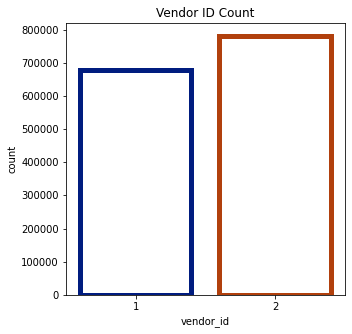

In [196]:
plt.figure(figsize= (5,5))
sns.countplot(x = nyc_df['vendor_id'],facecolor=(0, 0, 0, 0), linewidth=5, edgecolor=sns.color_palette("dark", 2))
plt.title('Vendor ID Count')
plt.show()

There are **780302** entries of **'2'** vendor id and **678342** entries of **'1'** vendor id.

In [197]:
nyc_df['passenger_count'].value_counts().to_frame()

,passenger_count
1,1033540
2,210318
5,78088
3,59896
6,48333
4,28404
0,60
7,3
9,1
8,1


There are 60 entries of 0, 3 entries of 7, 1 entry of each 8 and 9 passenger in dataset.

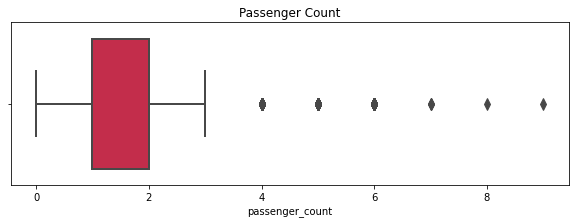

In [198]:
plt.figure(figsize= (10,3))
sns.boxplot(x = nyc_df['passenger_count'], color = 'crimson', linewidth=2, fliersize=8)
plt.title('Passenger Count')
plt.show()

In [199]:
# Removing 0,7,8 and 9 passenger count entries.
nyc_df = nyc_df[nyc_df['passenger_count']!=0]
nyc_df = nyc_df[nyc_df['passenger_count']<=6]

In [200]:
# Checking passener count 
nyc_df['passenger_count'].value_counts().to_frame()

,passenger_count
1,1033540
2,210318
5,78088
3,59896
6,48333
4,28404


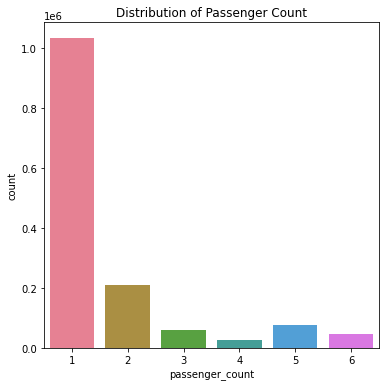

In [201]:
# Countolot of passenger count
plt.figure(figsize=(6,6))
sns.countplot(x=nyc_df['passenger_count'], palette = 'husl')
plt.title('Distribution of Passenger Count')
plt.show()

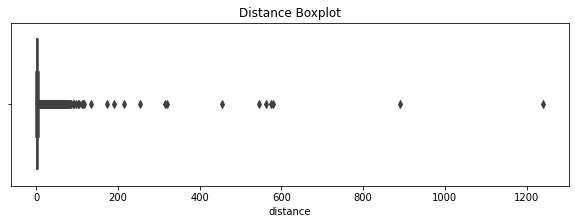

In [203]:
plt.figure(figsize= (10,3))
sns.boxplot(x = nyc_df['distance'])
plt.title('Distance Boxplot')
plt.show()

There some trips whose distance is above 100 km and some of trips are having 0 Km distance.

In [204]:
# Check number of trips with 0 Km distance
distance_zero = len(nyc_df[nyc_df['distance']== 0])
print(f'The ntotal number of trips with 0 Km distance are \n {distance_zero}')

The ntotal number of trips with 0 Km distance are 
 5887


Lets explore the distance feature which has 0 km as a input.

In [205]:
# Created a df for zero distance
zero_distance_df = nyc_df[nyc_df['distance']==0]

In [206]:
zero_distance_df.shape

(5887, 21)

In [207]:
zero_distance_df['trip_duration'].describe()

count     5887.000000
mean       536.294547
std       1953.648278
min          1.000000
25%         38.000000
50%        352.000000
75%        725.500000
max      86352.000000
Name: trip_duration, dtype: float64

In this 0 distance df we found there is a trip duration given so instead dropping 0 distance filled with median.

In [208]:
# Replacing 0 distance with median
nyc_df['distance'] = nyc_df['distance'].apply(lambda x: nyc_df['distance'].median() if x == 0 else x)

In [209]:
distance_abv_100 = len(nyc_df[nyc_df['distance'] >= 100])
print(f'The total number of trips with mmore than 100 Km distance are \n {distance_abv_100}')

The total number of trips with mmore than 100 Km distance are 
 19


In [292]:
# Dropped rows with distance above 100km as it has very few entries
nyc_df = nyc_df[nyc_df['distance']<=100]

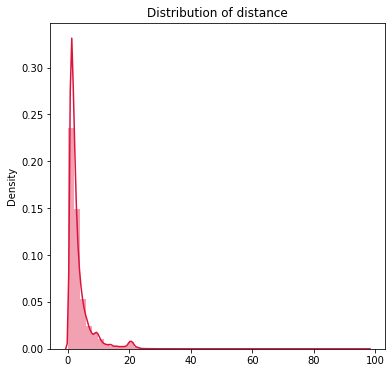

In [293]:
# Distribution of distance
plt.figure(figsize=(6,6))
sns.distplot(x= nyc_df['distance'], color = 'crimson')
plt.title('Distribution of distance')
plt.show()

In [294]:
print(nyc_df['distance'].median())
print(nyc_df['distance'].mean())

2.10697289851414
3.4617873559637795


This distance distribution plot is right skewed. **Mean is a greater than median** .

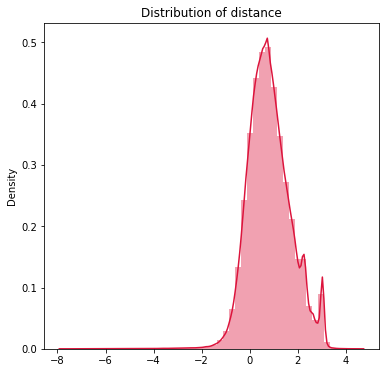

In [295]:
# Log transformed plot
plt.figure(figsize=(6,6))
sns.distplot(x= np.log(nyc_df['distance']), color = 'crimson')
plt.title('Distribution of distance')
plt.show()

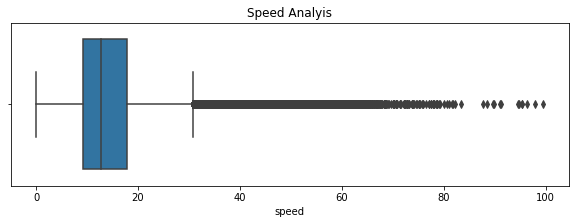

In [296]:
# Checking speed of trips
plt.figure(figsize= (10,3))
sns.boxplot(x = nyc_df['speed'])
plt.title('Speed Analyis')
plt.show()

In [297]:
# Lets see the average speed of a trip
nyc_df['speed'].mean()

14.383628618974116

In [298]:
number_trips_above_avg_speed = len(nyc_df[nyc_df['speed'] > nyc_df['speed'].mean()])
print(f'The total number of trips with more than avg speed are \n {number_trips_above_avg_speed }.')

The total number of trips with more than avg speed are 
 588298.


In [299]:
temp_df = nyc_df[nyc_df['speed'] <=100]
number_trips_lessthan_100 = len(temp_df[temp_df['speed'] <= 100 ])
print(f'The total number of trips with less than or eqaul to 100km/hr speed are {number_trips_lessthan_100}.')

The total number of trips with less than or eqaul to 100km/hr speed are 1449783.


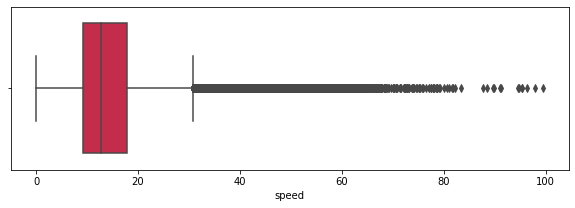

In [300]:
# Viz of Speed less than or equal to 100km/hr
plt.figure(figsize= (10,3))
sns.boxplot(x = temp_df['speed'], color = 'crimson')
plt.show()

In [301]:
# Dropping rows with speed more than 100km/hr
outlier_speed_df = nyc_df[nyc_df['speed'] > 100]
nyc_df = nyc_df.drop(outlier_speed_df.index, axis=0)

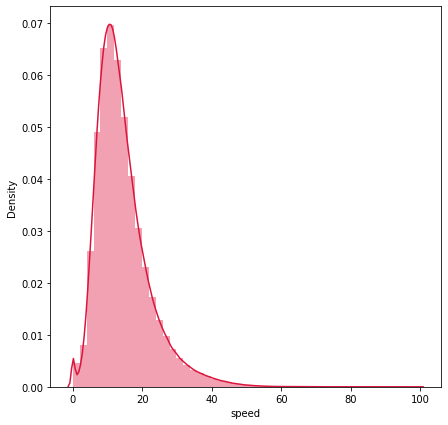

In [302]:
# Distribution of speed
plt.figure(figsize=(7,7))
sns.distplot(nyc_df['speed'],color="crimson")
plt.show()

Trip Duration is our target variable.

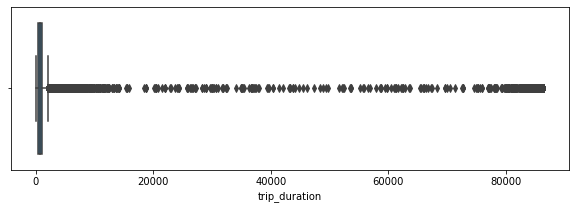

In [303]:
# Boxplot for a trip duration
plt.figure(figsize= (10,3))
sns.boxplot(x = nyc_df['trip_duration'])
plt.show()

In [304]:
outlier_trip_pred = nyc_df.nlargest(4, 'trip_duration')
nyc_df = nyc_df.drop(outlier_trip_pred.index, axis=0)

In [305]:
# Checking number of trips with less than 60 seconds
trips_less_than_sixty_seconds = nyc_df[nyc_df['trip_duration']<60]

In [306]:
# Shape of trips less than 60 seconds
trips_less_than_sixty_seconds.shape

(0, 21)

In [307]:
# Keeping only trips with trip duration more than 60 seconds
nyc_df = nyc_df[nyc_df['trip_duration']>60]

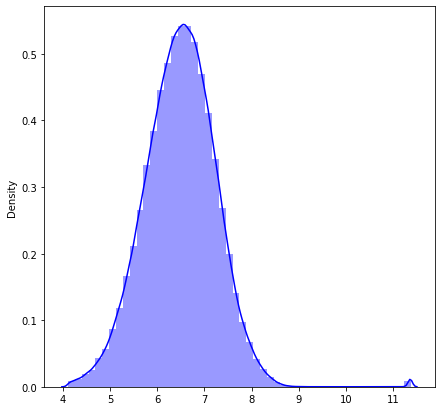

In [308]:
# Log transformed plot of a trip duration
plt.figure(figsize=(7,7))
sns.distplot(x=np.log(nyc_df['trip_duration']), color="blue")
plt.show()

In [309]:
# Number of rows and column after processing data
nyc_df.shape

(1449779, 21)

In [310]:
# Daywise pickup count
nyc_df['pickup_day'].value_counts()

Friday       222185
Saturday     219560
Thursday     217222
Wednesday    208993
Tuesday      201580
Sunday       193997
Monday       186242
Name: pickup_day, dtype: int64

Pickup day data tell us about the **most of trips taken** on **Friday** and **Monday** is a day where **least trips taken.**

In [311]:
# Daywise drop off data
nyc_df['dropoff_day'].value_counts()

Friday       221681
Saturday     219594
Thursday     216397
Wednesday    208645
Tuesday      201347
Sunday       195854
Monday       186261
Name: dropoff_day, dtype: int64

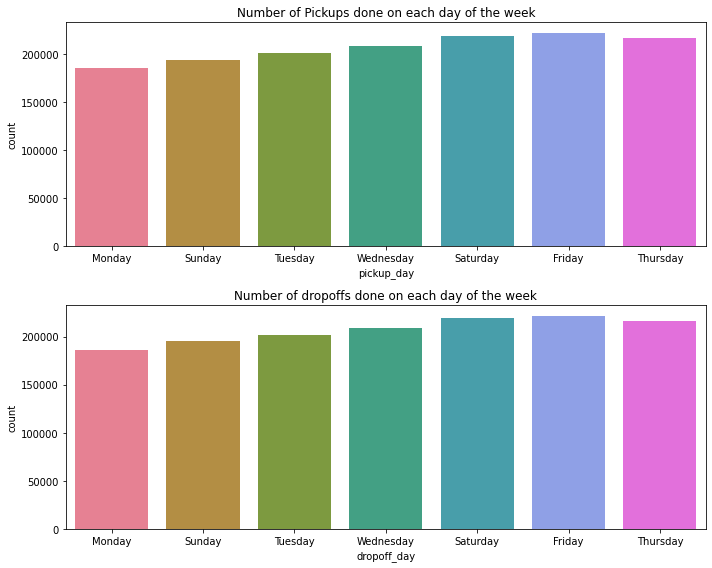

In [312]:
figure,ax=plt.subplots(nrows=2,ncols=1,figsize=(10,8))
sns.countplot(x='pickup_day',data=nyc_df, palette = 'husl', ax=ax[0])
ax[0].set_title('Number of Pickups done on each day of the week')
sns.countplot(x='dropoff_day',data=nyc_df, palette = 'husl', ax=ax[1])
ax[1].set_title('Number of dropoffs done on each day of the week')
plt.tight_layout()

In [313]:
# Monthwise pickup data
nyc_df['pickup_month'].value_counts()

3    254677
4    250043
5    246942
2    236887
6    232871
1    228359
Name: pickup_month, dtype: int64

In [314]:
# Monthwise drop off data
nyc_df['dropoff_month'].value_counts()

3    254621
4    250034
5    247011
2    236881
6    232798
1    228308
7       126
Name: dropoff_month, dtype: int64

In [315]:
# Few trips has a frop off in 7th month
nyc_df[nyc_df['dropoff_month']== 7].head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,pickup_day,dropoff_day,pickup_month,dropoff_month,pickup_hr,dropoff_hour,distance,speed,pick_up_time_day,drop_off_time_day
46600,id1230274,2,2016-06-30 08:00:53,2016-07-01 07:46:38,4,-73.922516,40.771847,-73.776398,40.645748,N,...,Thursday,Friday,6,7,8,7,18.662627,0.785381,Morning,Morning
54314,id0462006,1,2016-06-30 23:42:19,2016-07-01 00:01:12,1,-73.994049,40.756538,-74.007645,40.708820,N,...,Thursday,Friday,6,7,23,0,5.428265,17.247798,Night,Night
77419,id2787535,2,2016-06-30 23:51:36,2016-07-01 00:01:20,1,-73.971390,40.787788,-73.995918,40.762280,N,...,Thursday,Friday,6,7,23,0,3.508784,21.629491,Night,Night
115092,id2785585,2,2016-06-30 23:47:29,2016-07-01 00:08:00,1,-74.005623,40.750610,-73.962303,40.763119,N,...,Thursday,Friday,6,7,23,0,3.904872,11.419608,Night,Night
120601,id2981039,2,2016-06-30 23:50:19,2016-07-01 00:22:47,1,-73.978012,40.756420,-74.039848,40.619022,N,...,Thursday,Friday,6,7,23,0,16.143099,29.833243,Night,Night


Drop off month 7 tell us that **126 trips** started in 6th month and ended in 7th month.

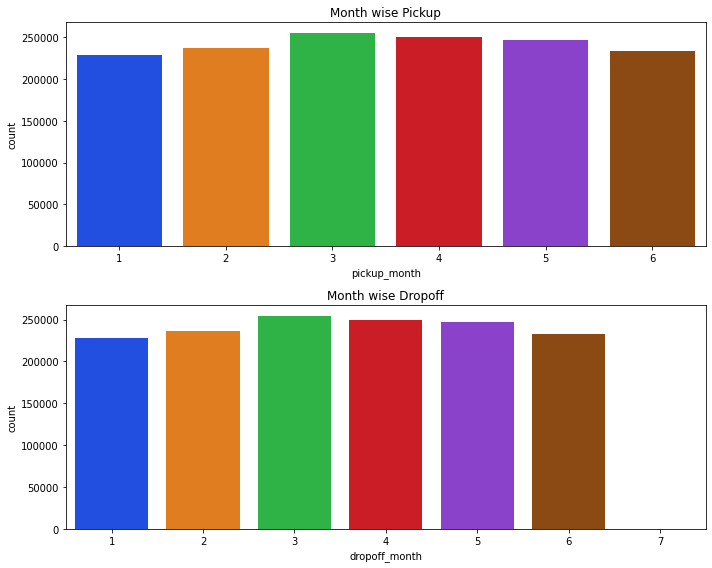

In [316]:
# Monthwise pickup and drop off count viz
figure,ax=plt.subplots(nrows=2,ncols=1,figsize=(10,8))
sns.countplot(x='pickup_month',data=nyc_df, palette = 'bright', ax=ax[0])
ax[0].set_title('Month wise Pickup')
sns.countplot(x='dropoff_month',data=nyc_df, palette = 'bright', ax=ax[1])
ax[1].set_title('Month wise Dropoff')
plt.tight_layout()

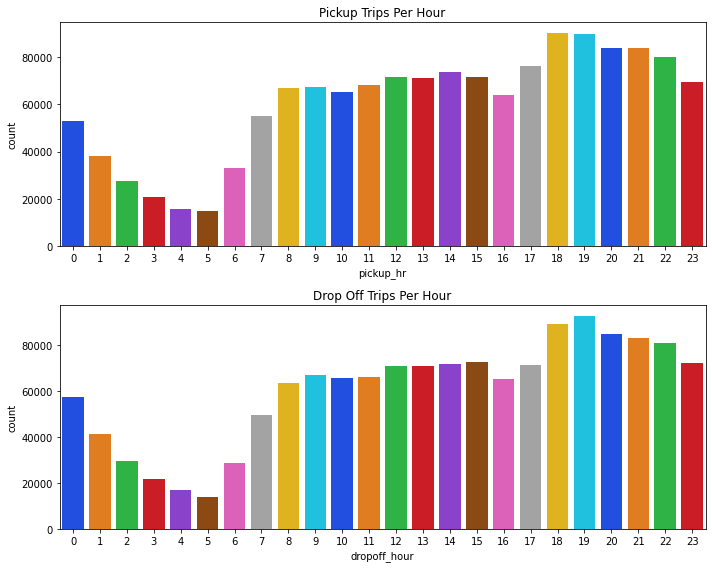

In [317]:
# Hourwise data of Pickup and Drop off
figure,ax=plt.subplots(nrows=2,ncols=1,figsize=(10,8))
sns.countplot(x='pickup_hr',data=nyc_df, palette = 'bright', ax=ax[0])
ax[0].set_title('Pickup Trips Per Hour')
sns.countplot(x='dropoff_hour',data=nyc_df, palette = 'bright', ax=ax[1])
ax[1].set_title('Drop Off Trips Per Hour')
plt.tight_layout()

In [318]:
# # Bivariate Viz
# plt.figure(figsize=(6,6))
# sns.barplot( x ='vendor_id', y='trip_duration', data=nyc_df, estimator=np.mean)
# plt.title('Vendor_ID vs Trip Duration')
# plt.show()

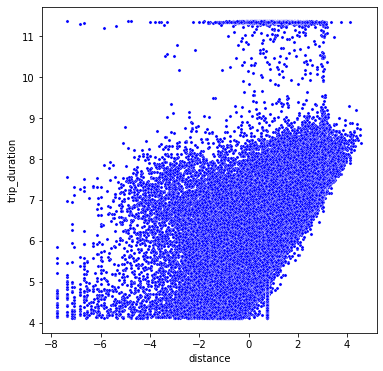

In [319]:
plt.figure(figsize=(6,6))
sns.scatterplot(x = np.log(nyc_df['distance']), y = np.log(nyc_df['trip_duration']), s = 10, color = 'Blue')
plt.show()

In [320]:
nycdf = nyc_df.copy()

In [323]:
nyc_x = nycdf.drop(['id', 'dropoff_datetime', 'pickup_longitude', 'pickup_datetime', 'store_and_fwd_flag', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'trip_duration', 'speed', 'pick_up_time_day', 'drop_off_time_day'], axis = 1)

In [324]:
nyc_x.head(2)

,vendor_id,passenger_count,pickup_day,dropoff_day,pickup_month,dropoff_month,pickup_hr,dropoff_hour,distance
0,2,1,Monday,Monday,3,3,17,17,1.498523
1,1,1,Sunday,Sunday,6,6,0,0,1.805510


In [325]:
nyc_X= pd.get_dummies(nyc_x, columns=["pickup_day", 'dropoff_day'], prefix=["day", 'drop_day' ], drop_first=True)

In [326]:
nyc_X.head()

,vendor_id,passenger_count,pickup_month,dropoff_month,pickup_hr,dropoff_hour,distance,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday,drop_day_Monday,drop_day_Saturday,drop_day_Sunday,drop_day_Thursday,drop_day_Tuesday,drop_day_Wednesday
0,2,1,3,3,17,17,1.498523,1,0,0,0,0,0,1,0,0,0,0,0
1,1,1,6,6,0,0,1.805510,0,0,1,0,0,0,0,0,1,0,0,0
2,2,1,1,1,11,12,6.385107,0,0,0,0,1,0,0,0,0,0,1,0
3,2,1,4,4,19,19,1.485500,0,0,0,0,0,1,0,0,0,0,0,1
4,2,1,3,3,13,13,1.188590,0,1,0,0,0,0,0,1,0,0,0,0


In [327]:
from scipy.stats import zscore
X = nyc_X.apply(zscore)

In [328]:
y = np.log10(nycdf['trip_duration'])

In [329]:
# importing train_test_split from sklearn
from sklearn.model_selection import train_test_split
# splitting the data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [330]:
# Check the shape of train dataset
print(x_train.shape,y_train.shape)

# Check the shape of test dataset
print(x_test.shape, y_test.shape)

(1159823, 19) (1159823,)
(289956, 19) (289956,)


In [331]:
# importing module
from sklearn.linear_model import LinearRegression
# creating an object of LinearRegression class
LR = LinearRegression()
# fitting the training data
LR.fit(x_train,y_train)

LinearRegression()

In [332]:
LR.score(x_train, y_train)

0.4254094431423395

In [333]:
LR.score(x_test, y_test)

0.42496384591655434

In [334]:
y_pred = LR.predict(x_test)

In [335]:
from sklearn.metrics import mean_squared_error

MSE  = mean_squared_error(y_test, y_pred)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MSE : 0.060921068284939296
RMSE : 0.24682193639330216


In [336]:
from sklearn.metrics import r2_score
r2 = r2_score((y_test), (y_pred))
print("R2 :" ,r2)
print("Adjusted R2 : ", 1-(1-r2_score((y_test), (y_pred)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)))

R2 : 0.42496384591655434
Adjusted R2 :  0.4249261628177754


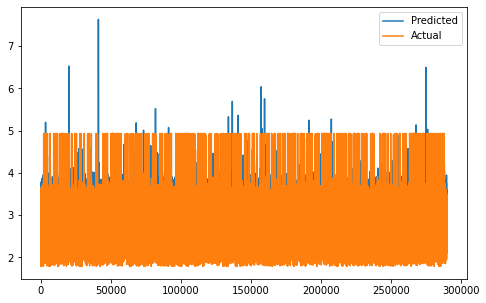

In [337]:
plt.figure(figsize=(8,5))
plt.plot((y_pred))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

In [338]:
from sklearn.linear_model import Lasso
lasso  = Lasso(alpha=0.00001 , max_iter= 3000)
lasso.fit(x_train, y_train)

Lasso(alpha=1e-05, max_iter=3000)

In [339]:
lasso.score(x_train, y_train)

0.42514775056559473

In [340]:
lasso.score(x_test,y_test)

0.4248363876179452

**Decision Tree**

In [341]:
from sklearn.tree import DecisionTreeRegressor

In [342]:
# Maximum depth of trees
max_depth = [2,4,6,8,10]
# Minimum number of samples required to split a node
min_samples_split = [5,10,15]
# Minimum number of samples required at each leaf node
min_samples_leaf = [20,30]
# Hyperparameter Grid
param_dict = {'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [343]:
from sklearn.model_selection import GridSearchCV
DT = DecisionTreeRegressor()
# Grid search
DT_grid = GridSearchCV(estimator=DT, param_grid = param_dict, cv = 3, verbose=2, scoring='r2')

DT_grid.fit(x_train,y_train)

Fitting 3 folds for each of 30 candidates, totalling 90 fits
[CV] END max_depth=2, min_samples_leaf=20, min_samples_split=5; total time=   1.1s
[CV] END max_depth=2, min_samples_leaf=20, min_samples_split=5; total time=   1.1s
[CV] END max_depth=2, min_samples_leaf=20, min_samples_split=5; total time=   1.2s
[CV] END max_depth=2, min_samples_leaf=20, min_samples_split=10; total time=   1.1s
[CV] END max_depth=2, min_samples_leaf=20, min_samples_split=10; total time=   1.1s
[CV] END max_depth=2, min_samples_leaf=20, min_samples_split=10; total time=   1.1s
[CV] END max_depth=2, min_samples_leaf=20, min_samples_split=15; total time=   1.1s
[CV] END max_depth=2, min_samples_leaf=20, min_samples_split=15; total time=   1.1s
[CV] END max_depth=2, min_samples_leaf=20, min_samples_split=15; total time=   1.1s
[CV] END max_depth=2, min_samples_leaf=30, min_samples_split=5; total time=   1.1s
[CV] END max_depth=2, min_samples_leaf=30, min_samples_split=5; total time=   1.1s
[CV] END max_depth=2

GridSearchCV(cv=3, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [2, 4, 6, 8, 10],
                         'min_samples_leaf': [20, 30],
                         'min_samples_split': [5, 10, 15]},
             scoring='r2', verbose=2)

In [344]:
print('The best fit alpha value is :' ,DT_grid.best_params_)
print('The R2 score using the same alpha is :', DT_grid.best_score_)

The best fit alpha value is : {'max_depth': 10, 'min_samples_leaf': 20, 'min_samples_split': 15}
The R2 score using the same alpha is : 0.6596792253479007


In [345]:
y_predict_train=DT_grid.predict(x_train)
y_predict_test=DT_grid.predict(x_test)

In [346]:
DT_train_r2 = r2_score(y_train, y_predict_train)
print("Train R2 :" ,DT_train_r2)

DT_train_r2_= 1-(1-r2_score(y_train, y_predict_train))*((x_train.shape[0]-1)/(x_train.shape[0]-x_train.shape[1]-1))
print("Train Adjusted R2 : ", DT_train_r2_)

Train R2 : 0.6653412091099394
Train Adjusted R2 :  0.6653357266986791


In [347]:
# Test Data
dt_test_r2 = r2_score(y_test, y_predict_test)
print("Test R2 :" ,dt_test_r2)

dt_test_r2_= 1-(1-r2_score(y_test, y_predict_test))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))
print("Test Adjusted R2 : ", dt_test_r2_)

Test R2 : 0.6601594316977455
Test Adjusted R2 :  0.6601371613663698
